# Unzip the compressed file:

In [9]:
#!rm -r "archive"
!unzip -q "archive.zip"

In [1]:
!file -i ./archive/Top_Posts_Comments.csv
!file -i ./archive/Top_Posts.csv

./archive/Top_Posts_Comments.csv: application/csv; charset=utf-8
./archive/Top_Posts.csv: application/csv; charset=utf-8


# **Import the libraries:**

In [1]:
import pandas as pd
from sklearn.utils import shuffle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC #Import SVM
from sklearn.neighbors import KNeighborsClassifier#Import KNN
from sklearn.naive_bayes import MultinomialNB #Import Naive Bayes
from sklearn.linear_model import LogisticRegression #Import LR
from sklearn.ensemble import RandomForestClassifier #Import RFC

from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# **Load the data from the dataset:**

Data:


,post_id,post_title,subreddit,post_url,flair_text,score,comments,upvote_ratio,date-time,year
0,gh1dj9,[Project] From books to presentations in 10s w...,MachineLearning,https://v.redd.it/v492uoheuxx41,Project,7798,186,0.99,2020-05-10 13:19:54,2020
1,kuc6tz,[D] A Demo from 1993 of 32-year-old Yann LeCun...,MachineLearning,https://v.redd.it/25nxi9ojfha61,Discussion,5851,133,0.98,2021-01-10 10:30:36,2021
2,g7nfvb,[R] First Order Motion Model applied to animat...,MachineLearning,https://v.redd.it/rlmmjm1q5wu41,Research,4761,111,0.97,2020-04-25 04:27:23,2020
3,lui92h,[N] AI can turn old photos into moving Images ...,MachineLearning,https://v.redd.it/ikd5gjlbi8k61,News,4688,230,0.97,2021-02-28 15:12:28,2021
4,ohxnts,[D] This AI reveals how much time politicians ...,MachineLearning,https://i.redd.it/34sgziebfia71.jpg,Discussion,4568,228,0.96,2021-07-11 04:18:59,2021
...,...,...,...,...,...,...,...,...,...,...
2982,slx33m,We live in beautiful times where you can learn...,artificial,https://github.com/louisfb01/start-machine-lea...,Discussion,84,6,0.90,2022-02-06 13:50:02,2022
2983,k9otbj,Yann LeCun’s Deep Learning Course Free From NYU,artificial,https://www.i-programmer.info/news/99-professi...,News,78,1,0.97,2020-12-09 09:22:52,2020
2984,k2orib,You Can Now Learn for FREE: 9 Courses by Googl...,artificial,https://laconicml.com/free-artificial-intellig...,Self Promotion,80,2,0.95,2020-11-28 14:43:43,2020
2985,ex9w4w,"Chatbot trained on ""public domain social media...",artificial,https://ai.googleblog.com/2020/01/towards-conv...,news,80,10,0.97,2020-02-01 17:55:23,2020


Data1:


,post_id,comment
0,gh1dj9,Twitter thread: [https://twitter.com/cyrildiag...
1,gh1dj9,The future 🤯
2,gh1dj9,Simple yet very useful. Thank you for sharing ...
3,gh1dj9,"Almost guaranteed, Apple will copy your idea i..."
4,gh1dj9,Ohh the nightmare of making this into a stable...
...,...,...
223169,efk5n3,LiDAR is mot powerful sensor for the auto driv...
223170,efk5n3,So it can now idenrify traffic lights? Musk pr...
223171,efk5n3,Hydranet bro!
223172,efk5n3,It even shows flashing yellow turn arrows.


Data2:


,post_id,post_title,subreddit,post_url,flair_text,score,comments,upvote_ratio,date-time,year,comment
0,gh1dj9,[Project] From books to presentations in 10s w...,MachineLearning,https://v.redd.it/v492uoheuxx41,Project,7798,186,0.99,2020-05-10 13:19:54,2020,Twitter thread: [https://twitter.com/cyrildiag...
1,gh1dj9,[Project] From books to presentations in 10s w...,MachineLearning,https://v.redd.it/v492uoheuxx41,Project,7798,186,0.99,2020-05-10 13:19:54,2020,The future 🤯
2,gh1dj9,[Project] From books to presentations in 10s w...,MachineLearning,https://v.redd.it/v492uoheuxx41,Project,7798,186,0.99,2020-05-10 13:19:54,2020,Simple yet very useful. Thank you for sharing ...
3,gh1dj9,[Project] From books to presentations in 10s w...,MachineLearning,https://v.redd.it/v492uoheuxx41,Project,7798,186,0.99,2020-05-10 13:19:54,2020,"Almost guaranteed, Apple will copy your idea i..."
4,gh1dj9,[Project] From books to presentations in 10s w...,MachineLearning,https://v.redd.it/v492uoheuxx41,Project,7798,186,0.99,2020-05-10 13:19:54,2020,Ohh the nightmare of making this into a stable...
...,...,...,...,...,...,...,...,...,...,...,...
223163,efk5n3,Tesla's Neural Net can now identify red and gr...,artificial,https://www.teslarati.com/tesla-holiday-update...,NaN,80,10,0.89,2019-12-25 18:50:50,2019,LiDAR is mot powerful sensor for the auto driv...
223164,efk5n3,Tesla's Neural Net can now identify red and gr...,artificial,https://www.teslarati.com/tesla-holiday-update...,NaN,80,10,0.89,2019-12-25 18:50:50,2019,So it can now idenrify traffic lights? Musk pr...
223165,efk5n3,Tesla's Neural Net can now identify red and gr...,artificial,https://www.teslarati.com/tesla-holiday-update...,NaN,80,10,0.89,2019-12-25 18:50:50,2019,Hydranet bro!
223166,efk5n3,Tesla's Neural Net can now identify red and gr...,artificial,https://www.teslarati.com/tesla-holiday-update...,NaN,80,10,0.89,2019-12-25 18:50:50,2019,It even shows flashing yellow turn arrows.


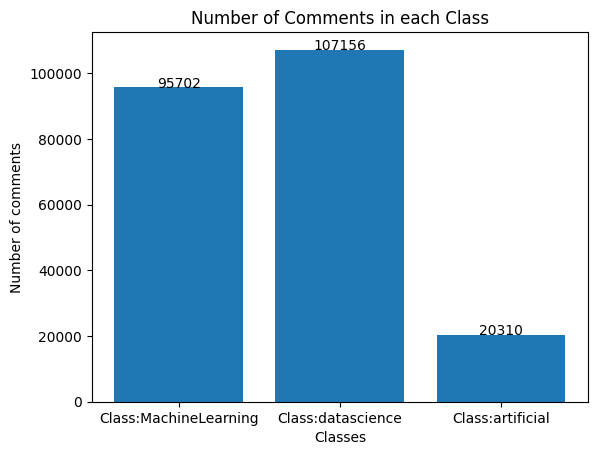

In [2]:
# Load data
data1 = pd.read_csv("./archive/Top_Posts_Comments.csv", encoding="UTF-8", index_col=False)
data = pd.read_csv("./archive/Top_Posts.csv", encoding="UTF-8", index_col=False)
data2 = pd.merge(data, data1, on='post_id')

# Visualize data
print("Data:")
display(data)

print("Data1:")
display(data1)

print("Data2:")
display(data2)

data_dict = {"Class:MachineLearning": len(data2[data2["subreddit"]=="MachineLearning"].comment),"Class:datascience": len(data2[data2["subreddit"]=="datascience"].comment),"Class:artificial": len(data2[data2["subreddit"]=="artificial"].comment)}
# Create bar chart
plt.bar(range(len(data_dict)), list(data_dict.values()), align='center')

# Set the x-ticks to be the keys of the dictionary
plt.xticks(range(len(data_dict)), list(data_dict.keys()))

# Display the values on top of each bar
for i, v in enumerate(data_dict.values()):
    plt.text(i, v + 1, str(v), ha='center')

# Add axis labels and title
plt.xlabel('Classes')
plt.ylabel('Number of comments')
plt.title('Number of Comments in each Class')

# Show the plot
plt.show()

# Since we have 20,310 number of comments under artificial class, we consider it as max value of data set. This will make the number of comments in each class balanced. 

20310 20310 20310


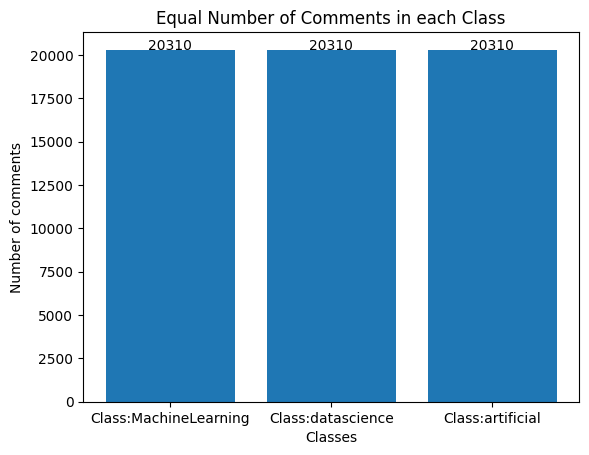

In [3]:
#Equalizing the count of class data
adata=data2[data2["subreddit"]=="artificial"]
L = len(adata)
mdata=data2[data2["subreddit"]=="MachineLearning"][:L]
ddata=data2[data2["subreddit"]=="datascience"][:L]
print(len(adata),len(mdata),len(ddata))
data_dict = {"Class:MachineLearning": len(mdata),"Class:datascience": len(ddata),"Class:artificial": len(adata)}
# Create bar chart
plt.bar(range(len(data_dict)), list(data_dict.values()), align='center')

# Set the x-ticks to be the keys of the dictionary
plt.xticks(range(len(data_dict)), list(data_dict.keys()))

# Display the values on top of each bar
for i, v in enumerate(data_dict.values()):
    plt.text(i, v + 1, str(v), ha='center')

# Add axis labels and title
plt.xlabel('Classes')
plt.ylabel('Number of comments')
plt.title('Equal Number of Comments in each Class')

# Show the plot
plt.show()


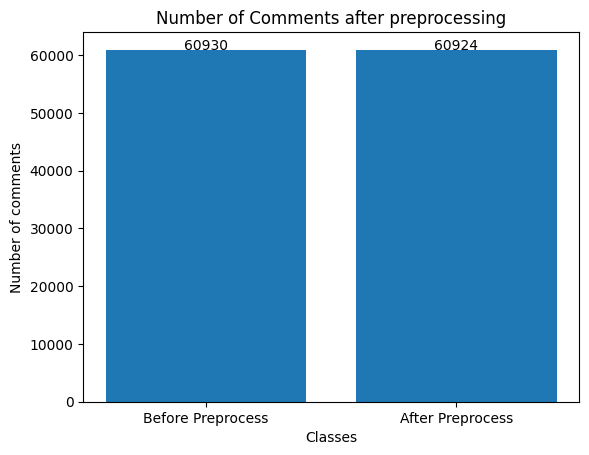

In [4]:
DF = pd.concat([mdata, adata, ddata])
DF = shuffle(DF, random_state=42)
DF
DF_before = len(DF)

# Preprocess data
DF.dropna(subset=['comment'], inplace=True)
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(DF['comment'])
y = DF['subreddit']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=47)
DF_after = len(DF)

data_dict = {"Before Preprocess": DF_before,"After Preprocess": DF_after}
# Create bar chart
plt.bar(range(len(data_dict)), list(data_dict.values()), align='center')

# Set the x-ticks to be the keys of the dictionary
plt.xticks(range(len(data_dict)), list(data_dict.keys()))

# Display the values on top of each bar
for i, v in enumerate(data_dict.values()):
    plt.text(i, v + 1, str(v), ha='center')

# Add axis labels and title
plt.xlabel('Classes')
plt.ylabel('Number of comments')
plt.title('Number of Comments after preprocessing')

# Show the plot
plt.show()


# **Linear Classifiers:**

1. SVM:

In [5]:
# Train SVM model
svm = SVC(kernel='linear', C=100, gamma='auto', degree=3, coef0=0.0,
          shrinking=True, probability=True, tol=0.001, cache_size=200,
          verbose=False, max_iter=-1, decision_function_shape='ovo',
          break_ties=False, random_state=42)

svm.fit(X_train[0:5000], y_train[:5000])

# Predict on test data
y_pred = svm.predict(X_test[0:500])

# Evaluate model
accuracy = accuracy_score(y_test[0:500], y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.502


2. Naive Bayes:

In [6]:
# Train Naive Bayes model
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.6338767917715286


3. Logistic Regression:

In [7]:
# Train logistic regression model
lr = LogisticRegression(max_iter=500)
lr.fit(X_train, y_train)

# Predict on test data
y_pred = lr.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.631414815625342


# **Non-Linear Classifiers:**

1. Random Forest

In [61]:
# Train Random Forest model
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

# Predict on test data
y_pred = rfc.predict(X_test[0:500])

accuracy = accuracy_score(y_test[0:500], y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.608


2. K-NN

In [57]:
# Train the k-NN model
from sklearn.neighbors import KNeighborsClassifier
k = int(500+500**.5) # Set the number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Predict on the test data
y_pred = knn.predict(X_test[:500])

# Evaluate the model
accuracy = accuracy_score(y_test[:500], y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.526


# **Visualize the Train and Test Accuracies of Linear Classifiers:**

1. SVM:

204 204


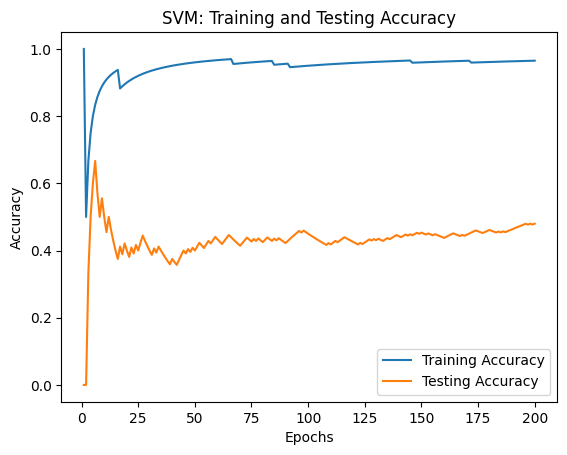

In [83]:
svm_train_acc = []
svm_test_acc = []
for i in range(1,205):
  y_pred = svm.predict(X_train[:i])
  svm_train_accuracy = accuracy_score(y_train[:i], y_pred)
  svm_train_acc.append(svm_train_accuracy)

for j in range(1,205):
  y_pred = svm.predict(X_test[:j])
  svm_test_accuracy = accuracy_score(y_test[:j], y_pred)
  svm_test_acc.append(svm_test_accuracy)

# Assume train_acc and test_acc are the lists containing training and testing accuracy values respectively
epoch_range = range(1, 201)
print(len(svm_train_acc),len(svm_test_acc))
# Plot training and testing accuracy values
plt.plot(epoch_range, svm_train_acc[:200], label='Training Accuracy')
plt.plot(epoch_range, svm_test_acc[:200], label='Testing Accuracy')

# Set plot labels and title
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('SVM: Training and Testing Accuracy')

# Set plot legend
plt.legend()

# Show plot
plt.show()

2. Naive Bayes:

204 204


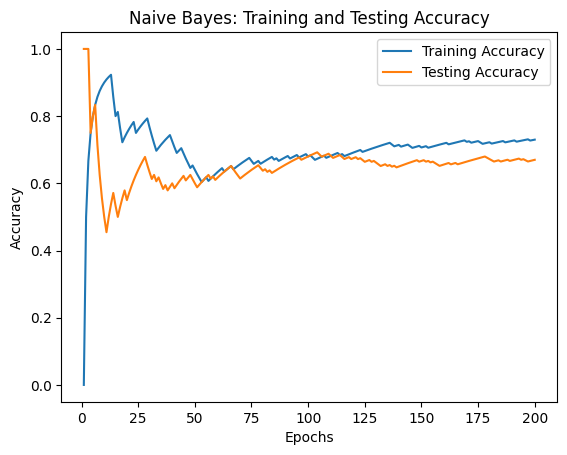

In [87]:
nb_train_acc = []
nb_test_acc = []
for i in range(1,205):
  y_pred = nb.predict(X_train[:i])
  nb_train_accuracy = accuracy_score(y_train[:i], y_pred)
  nb_train_acc.append(nb_train_accuracy)

for j in range(1,205):
  y_pred = nb.predict(X_test[:j])
  nb_test_accuracy = accuracy_score(y_test[:j], y_pred)
  nb_test_acc.append(nb_test_accuracy)

# Assume train_acc and test_acc are the lists containing training and testing accuracy values respectively
epoch_range = range(1, 201)
print(len(nb_train_acc),len(nb_test_acc))
# Plot training and testing accuracy values
plt.plot(epoch_range, nb_train_acc[:200], label='Training Accuracy')
plt.plot(epoch_range, nb_test_acc[:200], label='Testing Accuracy')

# Set plot labels and title
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Naive Bayes: Training and Testing Accuracy')

# Set plot legend
plt.legend()

# Show plot
plt.show()

3. Logistic Regression:

204 204


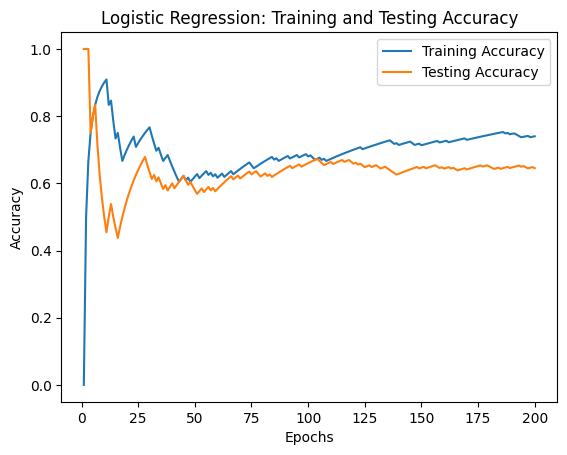

In [89]:
lr_train_acc = []
lr_test_acc = []
for i in range(1,205):
  y_pred = lr.predict(X_train[:i])
  lr_train_accuracy = accuracy_score(y_train[:i], y_pred)
  lr_train_acc.append(lr_train_accuracy)

for j in range(1,205):
  y_pred = lr.predict(X_test[:j])
  lr_test_accuracy = accuracy_score(y_test[:j], y_pred)
  lr_test_acc.append(lr_test_accuracy)

# Assume train_acc and test_acc are the lists containing training and testing accuracy values respectively
epoch_range = range(1, 201)
print(len(lr_train_acc),len(lr_test_acc))
# Plot training and testing accuracy values
plt.plot(epoch_range, lr_train_acc[:200], label='Training Accuracy')
plt.plot(epoch_range, lr_test_acc[:200], label='Testing Accuracy')

# Set plot labels and title
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Logistic Regression: Training and Testing Accuracy')

# Set plot legend
plt.legend()

# Show plot
plt.show()

# **Visualize the Train and Test Accuracies of Non-Linear Classifiers:**

1. Random Forest:

204 204


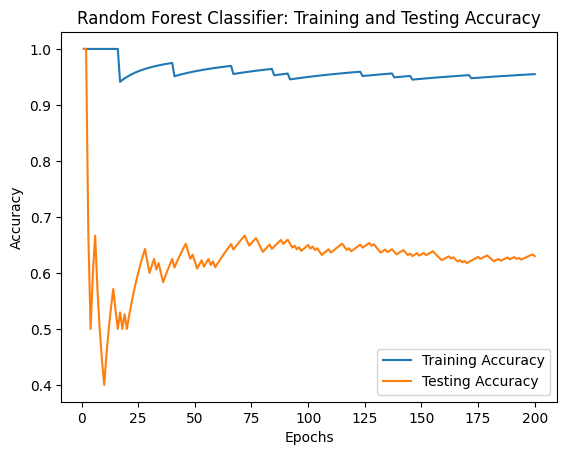

In [90]:
rfc_train_acc = []
rfc_test_acc = []
for i in range(1,205):
  y_pred = rfc.predict(X_train[:i])
  rfc_train_accuracy = accuracy_score(y_train[:i], y_pred)
  rfc_train_acc.append(rfc_train_accuracy)

for j in range(1,205):
  y_pred = rfc.predict(X_test[:j])
  rfc_test_accuracy = accuracy_score(y_test[:j], y_pred)
  rfc_test_acc.append(rfc_test_accuracy)

# Assume train_acc and test_acc are the lists containing training and testing accuracy values respectively
epoch_range = range(1, 201)
print(len(rfc_train_acc),len(rfc_test_acc))
# Plot training and testing accuracy values
plt.plot(epoch_range, rfc_train_acc[:200], label='Training Accuracy')
plt.plot(epoch_range, rfc_test_acc[:200], label='Testing Accuracy')

# Set plot labels and title
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Random Forest Classifier: Training and Testing Accuracy')

# Set plot legend
plt.legend()

# Show plot
plt.show()

2. K-nNeighbour:

204 204


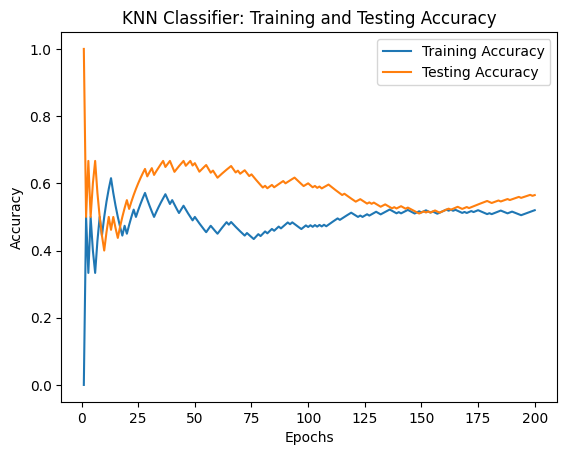

In [91]:
knn_train_acc = []
knn_test_acc = []
for i in range(1,205):
  y_pred = knn.predict(X_train[:i])
  knn_train_accuracy = accuracy_score(y_train[:i], y_pred)
  knn_train_acc.append(knn_train_accuracy)

for j in range(1,205):
  y_pred = knn.predict(X_test[:j])
  knn_test_accuracy = accuracy_score(y_test[:j], y_pred)
  knn_test_acc.append(knn_test_accuracy)

# Assume train_acc and test_acc are the lists containing training and testing accuracy values respectively
epoch_range = range(1, 201)
print(len(knn_train_acc),len(knn_test_acc))
# Plot training and testing accuracy values
plt.plot(epoch_range, knn_train_acc[:200], label='Training Accuracy')
plt.plot(epoch_range, knn_test_acc[:200], label='Testing Accuracy')

# Set plot labels and title
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('KNN Classifier: Training and Testing Accuracy')

# Set plot legend
plt.legend()

# Show plot
plt.show()